<a href="https://colab.research.google.com/github/Muhammad-Roshaan-Idrees/Artificial_Intelligence/blob/main/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📥 Loading Fashion-MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
➡ Original Dataset Shape: (60000, 28, 28)
➡ Original Labels Shape: (60000,)

🔄 Splitting dataset into 75% training and 25% testing...
📊 Final Train Shape: (45000, 28, 28)
📊 Final Test Shape: (15000, 28, 28)

✨ Preprocessing input images...
📐 Reshaped Train: (45000, 28, 28, 1)
📐 Reshaped Test: (15000, 28, 28, 1)

🖼 Showing sample training images...


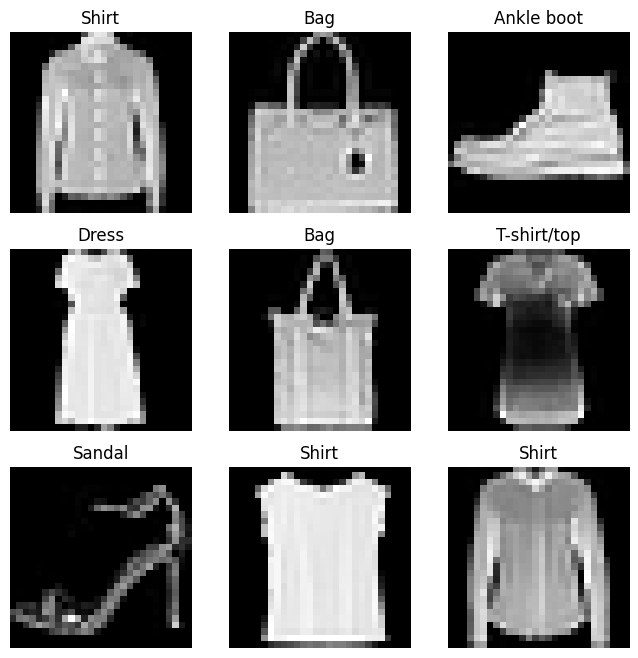


🛠 Building CNN model...

📄 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


⚙ Compiling model...

⏳ Training starting with EarlyStopping...
Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.7366 - loss: 0.7257 - val_accuracy: 0.8621 - val_loss: 0.3853
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.8714 - loss: 0.3472 - val_accuracy: 0.8844 - val_loss: 0.3126
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.8940 - loss: 0.2897 - val_accuracy: 0.8913 - val_loss: 0.2944
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9076 - loss: 0.2497 - val_accuracy: 0.9024 - val_loss: 0.2657
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.9167 - loss: 0.2266 - val_accuracy: 0.9042 - val_loss: 0.2567
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9311 - loss: 0.1928 - val_accuracy: 0.9104 - val_loss: 0.2483
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9354 - loss: 0.1784 - val_accuracy: 0.9088 - val_loss: 0.2526
Epoch 8/10


In [ ]:
# ====================================================
# 1. IMPORT LIBRARIES
# ====================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# ====================================================
# 2. LOAD DATA
# ====================================================
print("📥 Loading Fashion-MNIST dataset...")
(X, y), (X_test_original, y_test_original) = fashion_mnist.load_data()

print("➡ Original Dataset Shape:", X.shape)
print("➡ Original Labels Shape:", y.shape)

# ====================================================
# 3. CREATE 75% TRAIN + 25% TEST SPLIT
# ====================================================
print("\n🔄 Splitting dataset into 75% training and 25% testing...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

print("📊 Final Train Shape:", X_train.shape)
print("📊 Final Test Shape:", X_test.shape)

# ====================================================
# 4. PREPROCESSING
# ====================================================
print("\n✨ Preprocessing input images...")

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("📐 Reshaped Train:", X_train.shape)
print("📐 Reshaped Test:", X_test.shape)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ====================================================
# 5. VISUALIZE SAMPLE IMAGES
# ====================================================
print("\n🖼 Showing sample training images...")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# ====================================================
# 6. BUILD CNN MODEL
# # ====================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("\n🛠 Building CNN model...")

from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28,28,1)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


print("\n📄 Model Summary:")
model.summary()

# ====================================================
# 7. COMPILE MODEL
# ====================================================
print("\n⚙ Compiling model...")

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ====================================================
# 8. ADD EARLY STOPPING
# ====================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print("\n⏳ Training starting with EarlyStopping...")

# ====================================================
# 9. TRAIN MODEL
# ====================================================
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stop]
)

print("\n✅ Training complete!")

# ====================================================
# 10. PLOT ACCURACY & LOSS
# ====================================================
print("\n📈 Plotting training graphs...")

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.show()

# ====================================================
# 11. EVALUATION
# ====================================================
print("\n🧪 Evaluating model on 25% test data...")

test_loss, test_acc = model.evaluate(X_test, y_test)
print("🎯 Test Accuracy:", test_acc)
print("📉 Test Loss:", test_loss)

# ====================================================
# 12. CONFUSION MATRIX + CLASSIFICATION REPORT
# ====================================================
print("\n📘 Generating Confusion Matrix...")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# ====================================================
# 13. VISUALIZE CORRECT & INCORRECT PREDICTIONS
# ====================================================
correct = np.where(y_pred_classes == y_test)[0]
incorrect = np.where(y_pred_classes != y_test)[0]

print("\n👍 Showing correct predictions...")
plt.figure(figsize=(10,4))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(class_names[y_pred_classes[idx]])
    plt.axis('off')
plt.show()

print("\n❌ Showing incorrect predictions...")
plt.figure(figsize=(10,4))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()